In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")
from sklearn.preprocessing import StandardScaler

In [2]:
# # pip install ucimlrepo
# from ucimlrepo import fetch_ucirepo 
  
# # fetch dataset 
# individual_household_electric_power_consumption = fetch_ucirepo(id=235) 
  
# # data (as pandas dataframes) 
# X = individual_household_electric_power_consumption.data.features 
# y = individual_household_electric_power_consumption.data.targets 
  
# # metadata 
# # print(individual_household_electric_power_consumption.metadata) 
  
# # variable information 
# # print(individual_household_electric_power_consumption.variables) 

In [3]:
# df = X.copy()

In [147]:
# X.to_csv('Electric_Power_Consumption.csv', index=False)
df = pd.read_csv('Electric_Power_Consumption.csv', low_memory=False)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


### Data Set Information:

The dataset comprises records of electric power consumption in one household with a one-minute sampling rate. It contains 2075259 measurements gathered between December 2006 and November 2010 (47 months).
#### Notes:
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

### Attribute Information
1) Date (object): The date of the observation, formatted as dd/mm/yyyy.<br>
2) Time (object): The time of the observation, in hh:mm:ss format.<br>
3) Global_active_power (float64): The total active power consumed by the household (in kilowatts).<br>
4) Global_reactive_power (float64): The total reactive power consumed by the household (in kilowatts).<br>
5) Voltage (float64): Average voltage (in volts).<br>
6) Global_intensity (float64): Average current intensity (in amperes).<br>
7) Sub_metering_1 (float64): Energy sub-metering No. 1, corresponding to the kitchen (in watt-hour of active energy).<br>
8) Sub_metering_2 (float64): Energy sub-metering No. 2, corresponding to the laundry room (in watt-hour of active energy).<br>
9) Sub_metering_3 (float64): Energy sub-metering No. 3, corresponding to an electric water-heater and an air-conditioner (in watt-hour of active energy).

## Problem Statement
##### Predict future household electricity consumption using historical data by forecasting Global_active_power for upcoming dates and times. This involves analyzing past consumption trends and incorporating additional factors like date, time, and energy usage in specific household areas (sub-metering values).
This problem is interesting and valuable for several reasons:

Energy Efficiency: Understanding and predicting household energy consumption can help in optimizing energy usage, reducing costs, and improving energy efficiency.
Demand Forecasting: Accurate predictions can aid in energy demand forecasting, which is crucial for energy suppliers to maintain a balance between energy supply and demand.
Anomaly Detection: Identifying unusual patterns of energy consumption could indicate potential issues or opportunities for further energy savings.

Will use first 3 months to train and test on last month

In [148]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [149]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Define the start and end date for the four-month period
start_date = '2006-12-16'
end_date = '2007-04-01'

# Filter the dataset for the specified date range
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

In [150]:
# df.to_csv('Electric_consumption_4.csv', index=False)

In [151]:
df = pd.read_csv('Electric_consumption_4.csv')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [152]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           9
dtype: int64

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153036 entries, 0 to 153035
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   153036 non-null  object 
 1   Time                   153036 non-null  object 
 2   Global_active_power    153036 non-null  object 
 3   Global_reactive_power  153036 non-null  object 
 4   Voltage                153036 non-null  object 
 5   Global_intensity       153036 non-null  object 
 6   Sub_metering_1         153036 non-null  object 
 7   Sub_metering_2         153036 non-null  object 
 8   Sub_metering_3         153027 non-null  float64
dtypes: float64(1), object(8)
memory usage: 10.5+ MB


Apart from NaN values, we have a lot of "?" values which would be considered as NaN.

In [154]:
# First, convert the "?" to NaN to make them identifiable as missing values
df.replace("?", pd.NA, inplace=True)

In [155]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      9
Global_reactive_power    9
Voltage                  9
Global_intensity         9
Sub_metering_1           9
Sub_metering_2           9
Sub_metering_3           9
dtype: int64

In [156]:
missing_columns = ["Global_active_power", "Global_reactive_power", "Voltage", 
                   "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]
df[missing_columns].isna().all(axis=1).sum() # missing_values_same_record

9

It states that there are 9 records in which all columns(except Date and Time), contain null values.

In [157]:
## Do it hour

In [158]:
df1 = df.copy()

### Correcting the datatypes

In [159]:
df1['Global_active_power'] = pd.to_numeric(df1['Global_active_power'], errors = 'coerce')
df1['Global_reactive_power'] = pd.to_numeric(df1['Global_reactive_power'], errors = 'coerce')
df1['Voltage'] = pd.to_numeric(df1['Voltage'], errors = 'coerce')
df1['Global_intensity'] = pd.to_numeric(df1['Global_intensity'], errors = 'coerce')
df1['Sub_metering_1'] = pd.to_numeric(df1['Sub_metering_1'], errors = 'coerce')
df1['Sub_metering_2'] = pd.to_numeric(df1['Sub_metering_2'], errors = 'coerce')
df1['Sub_metering_3'] = pd.to_numeric(df1['Sub_metering_3'], errors = 'coerce')

### Concatenating both date and time variable for further analysis based on time

In [160]:
df1['Datetime'] = pd.to_datetime(df1['Date'] + ' ' + df1['Time'], dayfirst=True)

# Dropping the original 'Date' and 'Time' columns as they are no longer needed
df1.drop(['Date', 'Time'], axis=1, inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_12160\775734234.py:1: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df1['Datetime'] = pd.to_datetime(df1['Date'] + ' ' + df1['Time'], dayfirst=True)


In [161]:
df1.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


### Analyzing null values

In [217]:
df2 = df1.copy()

In [218]:
for i in np.where(df2['Global_active_power'].isna())[0]:
    print(i)

6839
6840
19724
19725
41832
61909
98254
98255
142588


In [219]:
# df3 = df2.copy()
# df3['Global_active_power'] = df3['Global_active_power'].fillna(0)

In [220]:
# a=hourly_data.reset_index()
# plt.figure(figsize=(14,5))
# plt.plot(a.index,a['Global_active_power'])
# v_lines_24 = list(range(0,x,24))
# v_lines_8 = list(range(0,x,6))
# for i in v_lines_24:
#     # plt.axvline(x=i, color='red', linestyle='-', linewidth = 1)
#     plt.scatter(i,6, color='blue', marker='X')
# for i in v_lines_8:
#     plt.axvline(x=i, color='black', linestyle='-', linewidth=0.1)
# data_null = df3.iloc[np.where(df3['Global_active_power'] == 0)]
# plt.scatter(data_null.index, data_null['Global_active_power'], marker='x', s=5)

In [221]:
# Handling null values using forward fill
df2.fillna(method='ffill', inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_12160\4256529584.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2.fillna(method='ffill', inplace=True)


In [222]:
df2.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

In [223]:
# np.where(df2['Global_active_power'] == 0)
# np.where(data_null['Global_active_power'] == 0)


In [224]:
df2.set_index('Datetime', inplace=True)

In [225]:
hourly_data = df2.resample('H').agg({
    'Global_active_power': 'mean',
    'Global_reactive_power': 'mean',
    'Voltage': 'mean',
    'Global_intensity': 'mean',
    'Sub_metering_1': 'sum',
    'Sub_metering_2': 'sum',
    'Sub_metering_3': 'sum'
})

In [226]:
hourly_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,19.0,607.0
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,403.0,1012.0
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,86.0,1001.0
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.0,1007.0
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,25.0,1033.0
...,...,...,...,...,...,...,...
2007-04-01 19:00:00,3.312933,0.324567,234.449833,14.276667,0.0,1235.0,1012.0
2007-04-01 20:00:00,2.209833,0.191467,236.561333,9.426667,0.0,79.0,1029.0
2007-04-01 21:00:00,3.947367,0.281233,237.789833,16.660000,5.0,461.0,1040.0


In [227]:
# hourly_data.to_csv('hourly_data.csv')

In [11]:
hourly_data = pd.read_csv('hourly_data.csv')
hourly_data['Datetime'] = pd.to_datetime(hourly_data['Datetime'], dayfirst=True)
hourly_data.set_index('Datetime', inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_14156\1307316505.py:2: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  hourly_data['Datetime'] = pd.to_datetime(hourly_data['Datetime'], dayfirst=True)


In [12]:
hourly_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,19.0,607.0
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,403.0,1012.0
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,86.0,1001.0
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.0,1007.0
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,25.0,1033.0


In [13]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2551 entries, 2006-12-16 17:00:00 to 2007-04-01 23:00:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    2551 non-null   float64
 1   Global_reactive_power  2551 non-null   float64
 2   Voltage                2551 non-null   float64
 3   Global_intensity       2551 non-null   float64
 4   Sub_metering_1         2551 non-null   float64
 5   Sub_metering_2         2551 non-null   float64
 6   Sub_metering_3         2551 non-null   float64
dtypes: float64(7)
memory usage: 159.4 KB


The distribution shows a peak at lower values, indicating that low levels of power consumption are most common. There's a long tail towards higher consumption levels, suggesting occasional periods of high energy usage.

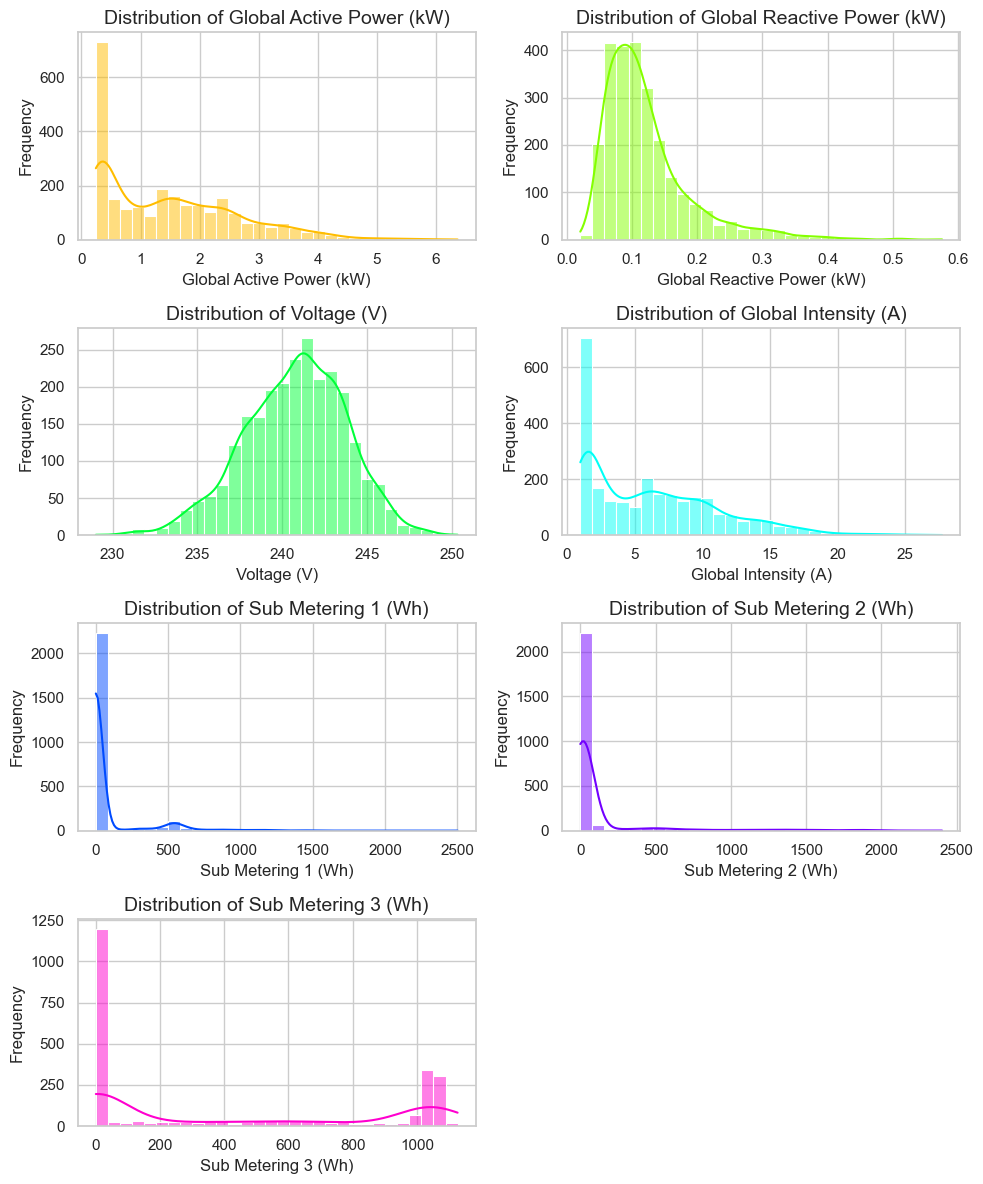

In [230]:
fig, axs = plt.subplots(4, 2, figsize=(10, 12))

# Flatten the array of axes
axs = axs.flatten()

# List of variables for univariate analysis
variables = [
    ('Global_active_power', 'Global Active Power (kW)'),
    ('Global_reactive_power', 'Global Reactive Power (kW)'),
    ('Voltage', 'Voltage (V)'),
    ('Global_intensity', 'Global Intensity (A)'),
    ('Sub_metering_1', 'Sub Metering 1 (Wh)'),
    ('Sub_metering_2', 'Sub Metering 2 (Wh)'),
    ('Sub_metering_3', 'Sub Metering 3 (Wh)')
]

# Generate plots
for i, (var, xlabel) in enumerate(variables):
    sns.histplot(hourly_data[var], bins=30, kde=True, ax=axs[i], color=sns.color_palette("hsv", 7)[i])
    axs[i].set_title(f'Distribution of {xlabel}', fontsize=14)
    axs[i].set_xlabel(xlabel, fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)

# Adjust layout
plt.tight_layout()

# Hide any unused axes
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.show()

Global Active Power: Shows a peak at lower power consumption levels with a long tail towards higher consumption, indicating occasional periods of high energy use.

<br>
Global Reactive Power: Concentrated around lower values, suggesting that the household's reactive power consumption is generally low.
<br>

Voltage: Appears to be normally distributed around 235 volts, indicating a relatively stable voltage supply.
<br>

Global Intensity: Similar distribution to Global Active Power, reinforcing the direct relationship between power consumption and intensity.
<br>

Sub Metering 1 (Kitchen): A significant peak at zero reflects periods when no energy is used, with occasional higher usage spikes.
<br>

Sub Metering 2 (Laundry Room): Also shows a large peak at zero, with varied consumption patterns reflecting the use of laundry appliances.
<br>

Sub Metering 3 (HVAC Systems): Less concentration at zero and a broader spread of values, suggesting more consistent use of systems like heating, ventilation, and air conditioning.

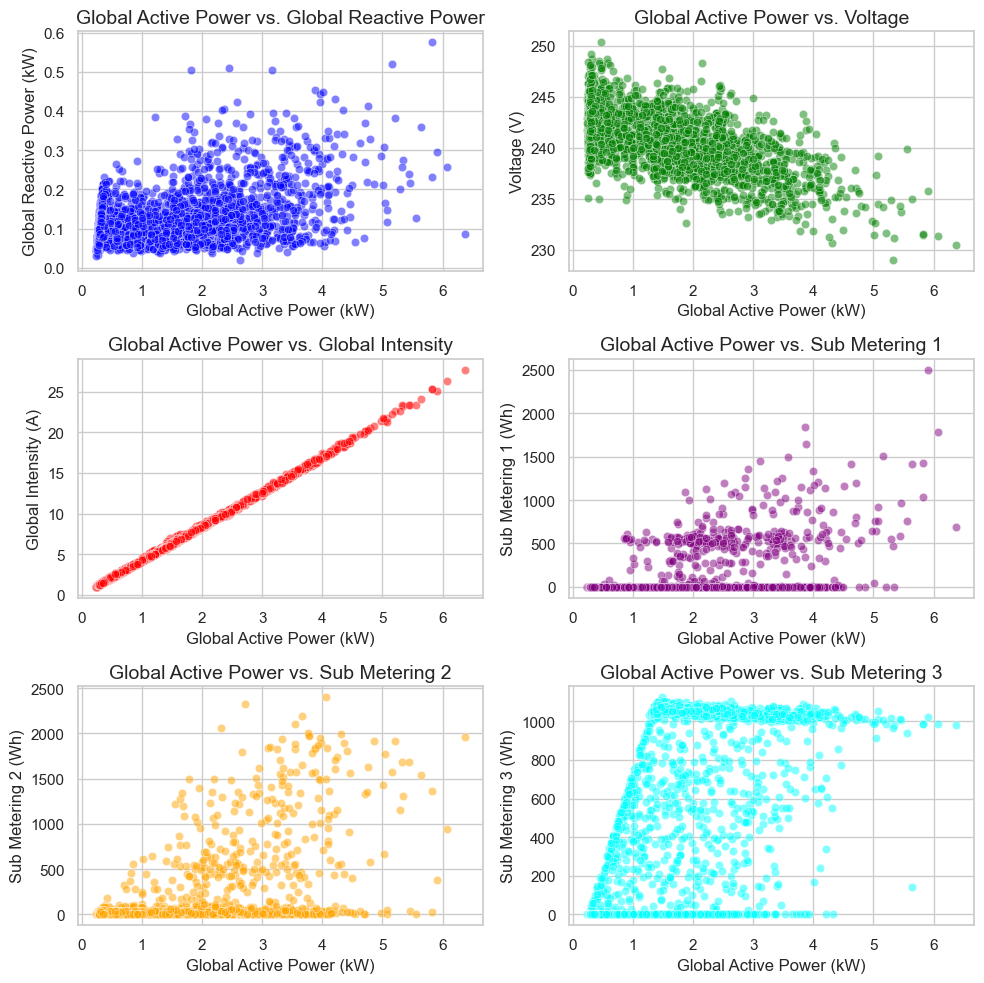

In [231]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Global Active Power vs. Global Reactive Power
sns.scatterplot(ax=axs[0, 0], data=hourly_data, x='Global_active_power', y='Global_reactive_power', color='blue', alpha=0.5)
axs[0, 0].set_title('Global Active Power vs. Global Reactive Power', fontsize=14)
axs[0, 0].set_xlabel('Global Active Power (kW)', fontsize=12)
axs[0, 0].set_ylabel('Global Reactive Power (kW)', fontsize=12)

# Global Active Power vs. Voltage
sns.scatterplot(ax=axs[0, 1], data=hourly_data, x='Global_active_power', y='Voltage', color='green', alpha=0.5)
axs[0, 1].set_title('Global Active Power vs. Voltage', fontsize=14)
axs[0, 1].set_xlabel('Global Active Power (kW)', fontsize=12)
axs[0, 1].set_ylabel('Voltage (V)', fontsize=12)

# Global Active Power vs. Global Intensity
sns.scatterplot(ax=axs[1, 0], data=hourly_data, x='Global_active_power', y='Global_intensity', color='red', alpha=0.5)
axs[1, 0].set_title('Global Active Power vs. Global Intensity', fontsize=14)
axs[1, 0].set_xlabel('Global Active Power (kW)', fontsize=12)
axs[1, 0].set_ylabel('Global Intensity (A)', fontsize=12)

# Global Active Power vs. Sub Metering 1
sns.scatterplot(ax=axs[1, 1], data=hourly_data, x='Global_active_power', y='Sub_metering_1', color='purple', alpha=0.5)
axs[1, 1].set_title('Global Active Power vs. Sub Metering 1', fontsize=14)
axs[1, 1].set_xlabel('Global Active Power (kW)', fontsize=12)
axs[1, 1].set_ylabel('Sub Metering 1 (Wh)', fontsize=12)

# Global Active Power vs. Sub Metering 2
sns.scatterplot(ax=axs[2, 0], data=hourly_data, x='Global_active_power', y='Sub_metering_2', color='orange', alpha=0.5)
axs[2, 0].set_title('Global Active Power vs. Sub Metering 2', fontsize=14)
axs[2, 0].set_xlabel('Global Active Power (kW)', fontsize=12)
axs[2, 0].set_ylabel('Sub Metering 2 (Wh)', fontsize=12)

# Global Active Power vs. Sub Metering 3
sns.scatterplot(ax=axs[2, 1], data=hourly_data, x='Global_active_power', y='Sub_metering_3', color='cyan', alpha=0.5)
axs[2, 1].set_title('Global Active Power vs. Sub Metering 3', fontsize=14)
axs[2, 1].set_xlabel('Global Active Power (kW)', fontsize=12)
axs[2, 1].set_ylabel('Sub Metering 3 (Wh)', fontsize=12)

plt.tight_layout()
plt.show()

Global Active Power vs. Global Reactive Power:

There's a wide spread of data points without a clear linear relationship, indicating that while both types of power are related to total energy consumption, their patterns can vary independently.
<br>

Global Active Power vs. Voltage:

The scatter plot shows a relatively dispersed distribution with no strong correlation. This suggests that variations in voltage do not have a direct linear relationship with the rate of energy consumption (Global Active Power).
<br>

Global Active Power vs. Global Intensity:

A more defined linear relationship is visible here, indicating a strong correlation between the rate of energy consumption and the electrical current intensity. This relationship is expected as Global Intensity directly reflects the amount of current flowing due to the energy consumption.
<br>

Global Active Power vs. Sub Metering 1 (Kitchen):

The data points are widely dispersed with a concentration at lower sub-metering values, indicating that kitchen appliances' energy use varies widely but often remains on the lower side.
<br>

Global Active Power vs. Sub Metering 2 (Laundry Room):

Similar to Sub Metering 1, there's a wide dispersion of data points. There are periods of low to no energy consumption as well as periods of higher consumption, reflecting variable usage patterns of laundry room appliances.
<br>

Global Active Power vs. Sub Metering 3 (HVAC Systems):

This plot shows a somewhat more consistent pattern of energy consumption compared to Sub Metering 1 and 2. While there's still a broad spread, it indicates regular usage of HVAC systems with varying levels of energy consumption.

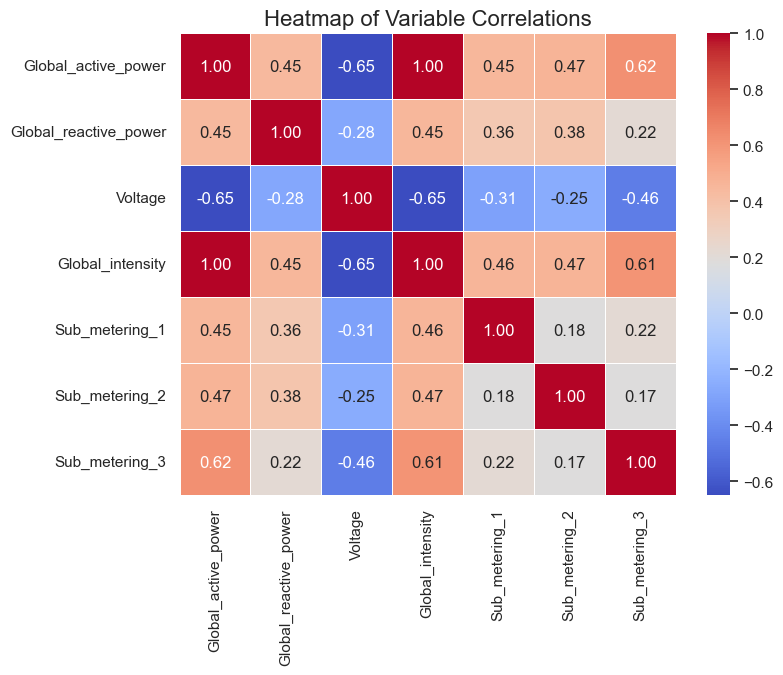

In [232]:
# For multivariate analysis, we'll use a heatmap to visualize the correlation between the variables in the dataset.
# This will help us understand how different variables are related to each other.

# Calculate correlation matrix
corr_matrix = hourly_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Variable Correlations', fontsize=16)
plt.show()

# Let's extract and provide insights based on the correlation matrix.


The heatmap of variable correlations provides several key insights into how different aspects of the household's energy consumption are interrelated:

Strong Positive Correlations:

Global Active Power and Global Intensity: With a correlation coefficient close to 1, this suggests a very strong positive relationship, indicating that as the total energy consumption increases, so does the electrical current intensity. This relationship is intuitive, as both metrics directly relate to how much energy is being u
<br>sed.
Sub Metering 3 (HVAC Systems) and Global Active Power: A relatively strong positive correlation suggests that a significant portion of the household's energy consumption is attributed to heating, ventilation, and air conditioning sys
tems.
Moderate Positive Correlations:

Global Reactive Power and Global Active Power: Although less strong than the correlation between Global Active Power and Global Intensity, there's still a moderate positive relationship, indicating that increases in active power consumption often come with increases in reactive power, albeit to a lesser
 extent.
Low or Insignificant Correlations:

Voltage and Other Variables: Voltage shows very low correlation with all other variables, suggesting that fluctuations in voltage have little direct impact on the measures of energy consumption within this
 household.
Sub Metering 1 (Kitchen) and Sub Metering 2 (Laundry Room): Both have low correlations with Global Active and Reactive Power, indicating varied and independent usage patterns of kitchen and laundry appliances from overall household energy consumption patterns.

### Time Series Analysis

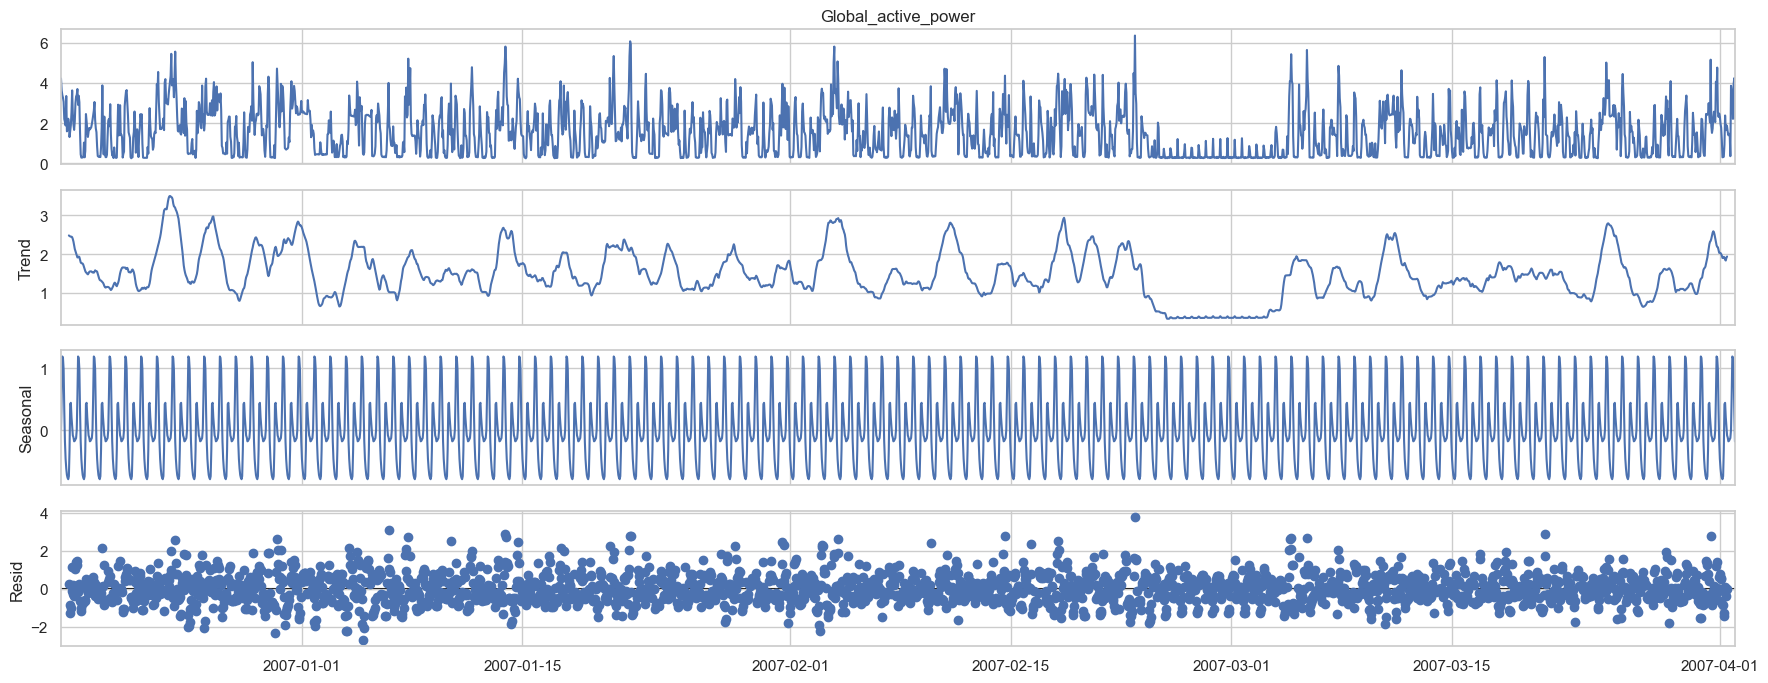

In [233]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the 'Global_active_power' time series
decomposition = seasonal_decompose(hourly_data['Global_active_power'], model='additive', period=24)

# Plotting the decomposition
fig = decomposition.plot()
fig.set_size_inches(18, 7)
fig.tight_layout()
plt.show()

The time series decomposition of Global_active_power reveals several key aspects of household energy consumption patterns:

Trend: The trend component shows the long-term movement in energy consumption. While there are fluctuations, it provides insight into periods of increasing or decreasing energy usage over time, possibly reflecting changes in household behavior, seasonal variations in energy needs, or the addition/removal of appliances.

Seasonality: The seasonal component captures the regular pattern of energy consumption within a day. Given the decomposition's 24-hour period, this seasonality reflects daily cycles in energy use, likely peaking during morning and evening hours when household activity is highest and dipping during the night and midday.

Residuals: The residuals, or irregular component, show the variation in energy consumption not explained by the trend or seasonality. This could include anomalous events, such as unusually high or low energy usage due to specific circumstances (e.g., guests, vacations, or appliance malfunctThe Residuals component, which represents the error of the model or the information not explained by the trend or seasonality, seems to have no apparent pattern, indicating the decomposition has captured significant components of the series).

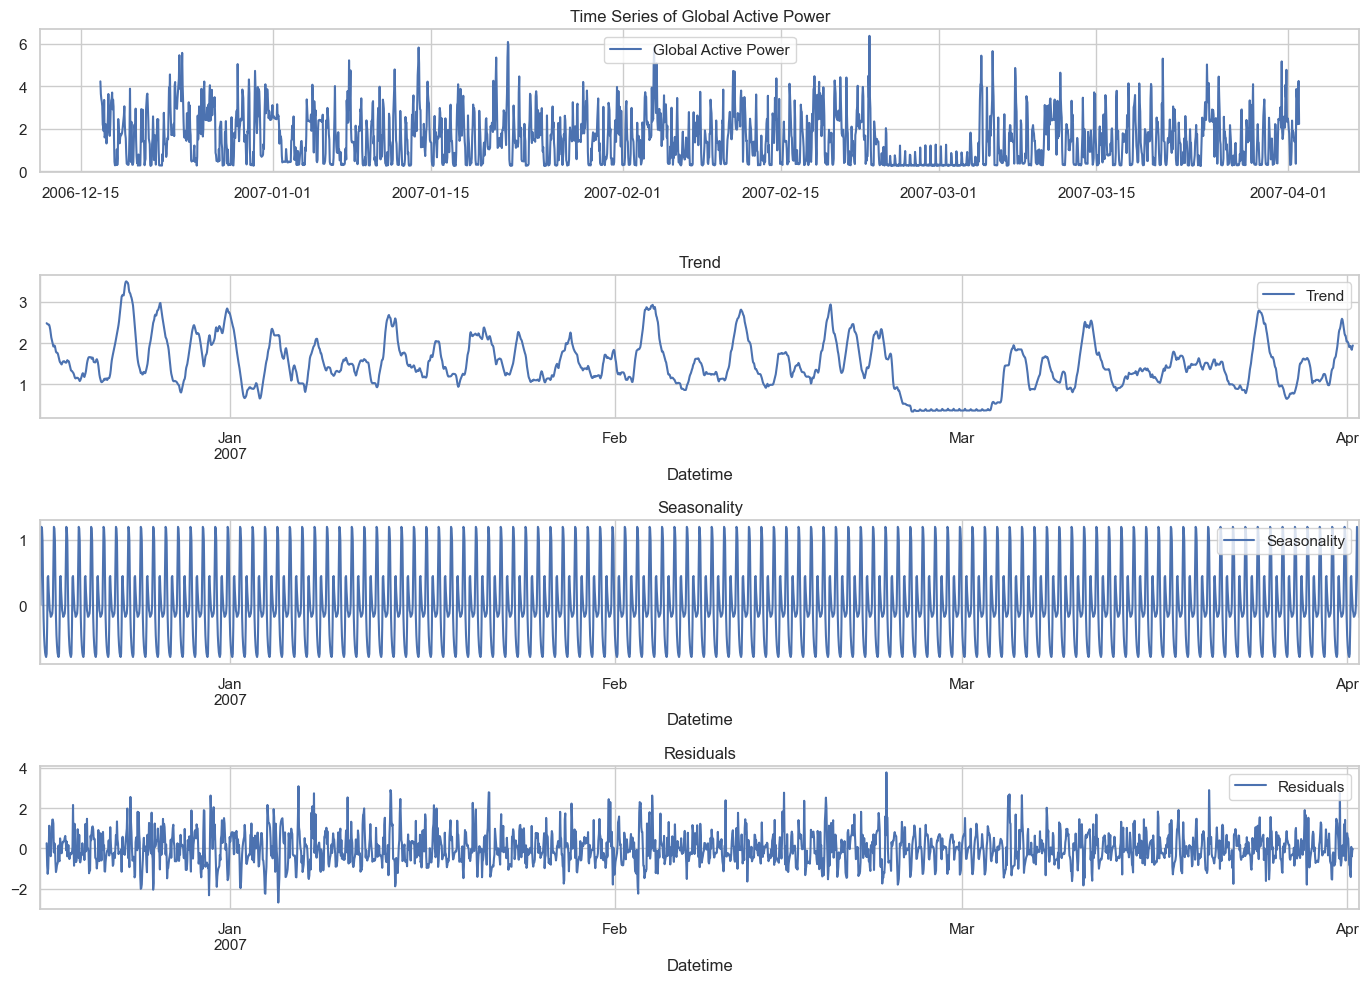

In [237]:
time_series_data = hourly_data['Global_active_power']
stl_decomposition = seasonal_decompose(time_series_data, model='additive', period=24)

# Plotting the results
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 10))

# Time Series plot
axes[0].plot(time_series_data, label='Global Active Power')
axes[0].set_title('Time Series of Global Active Power')
axes[0].legend()

# STL Decomposition plots
stl_decomposition.trend.plot(ax=axes[1], label='Trend')
axes[1].set_title('Trend')
axes[1].legend()

stl_decomposition.seasonal.plot(ax=axes[2], label='Seasonality')
axes[2].set_title('Seasonality')
axes[2].legend()

stl_decomposition.resid.plot(ax=axes[3], label='Residuals')
axes[3].set_title('Residuals')
axes[3].legend()

plt.tight_layout()
plt.show()

### Stationarity Test

In [238]:
# Proceeding with the time series analysis on the already filtered and indexed data
from statsmodels.tsa.stattools import adfuller
# 1. Test for Stationarity using the Augmented Dickey-Fuller test
adf_result = adfuller(hourly_data['Global_active_power'])
# Returning the ADF test result for stationarity
adf_result


(-7.69004392048863,
 1.4272686881468718e-11,
 27,
 2523,
 {'1%': -3.432944516713937,
  '5%': -2.8626862482960957,
  '10%': -2.567380191580307},
 5395.52843199126)

Stationarity: The Augmented Dickey-Fuller (ADF) test results show an ADF Statistic of -7.614, with a p-value of approximately 2.21e-11. Since the p-value is significantly less than 0.05, and the ADF statistic is smaller than all the critical values, we can reject the null hypothesis. This means the time series is stationary and does not require differencing to make it stationary.

### ACF/PACF

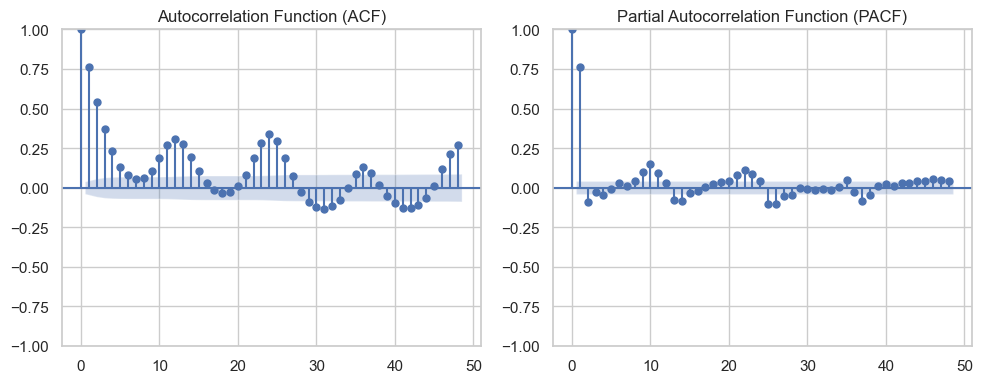

In [239]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting Autocorrelation and Partial Autocorrelation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Autocorrelation
plot_acf(hourly_data['Global_active_power'], lags=48, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# Partial Autocorrelation
plot_pacf(hourly_data['Global_active_power'], lags=48, ax=ax2, method='ywm')
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Aggregating data for daily, weekly, and monthly averages will follow.


ACF: The autocorrelation plot shows significant correlation at multiple lag values, gradually decreasing as the lag increases. This indicates a strong persistence in energy consumption from hour to hour, extending over several days. The pattern of spikes at 24-hour intervals suggests a daily cycle in energy usage, which is expected given the hourly records and daily routines.

PACF: The partial autocorrelation plot reveals significant autocorrelations at specific lags, with a notable cut-off after the first few lags. This suggests that an ARIMA model for forecasting might consider these early lags for the autoregressive component.

### Daily, Weekly and Monthly Averages analysis

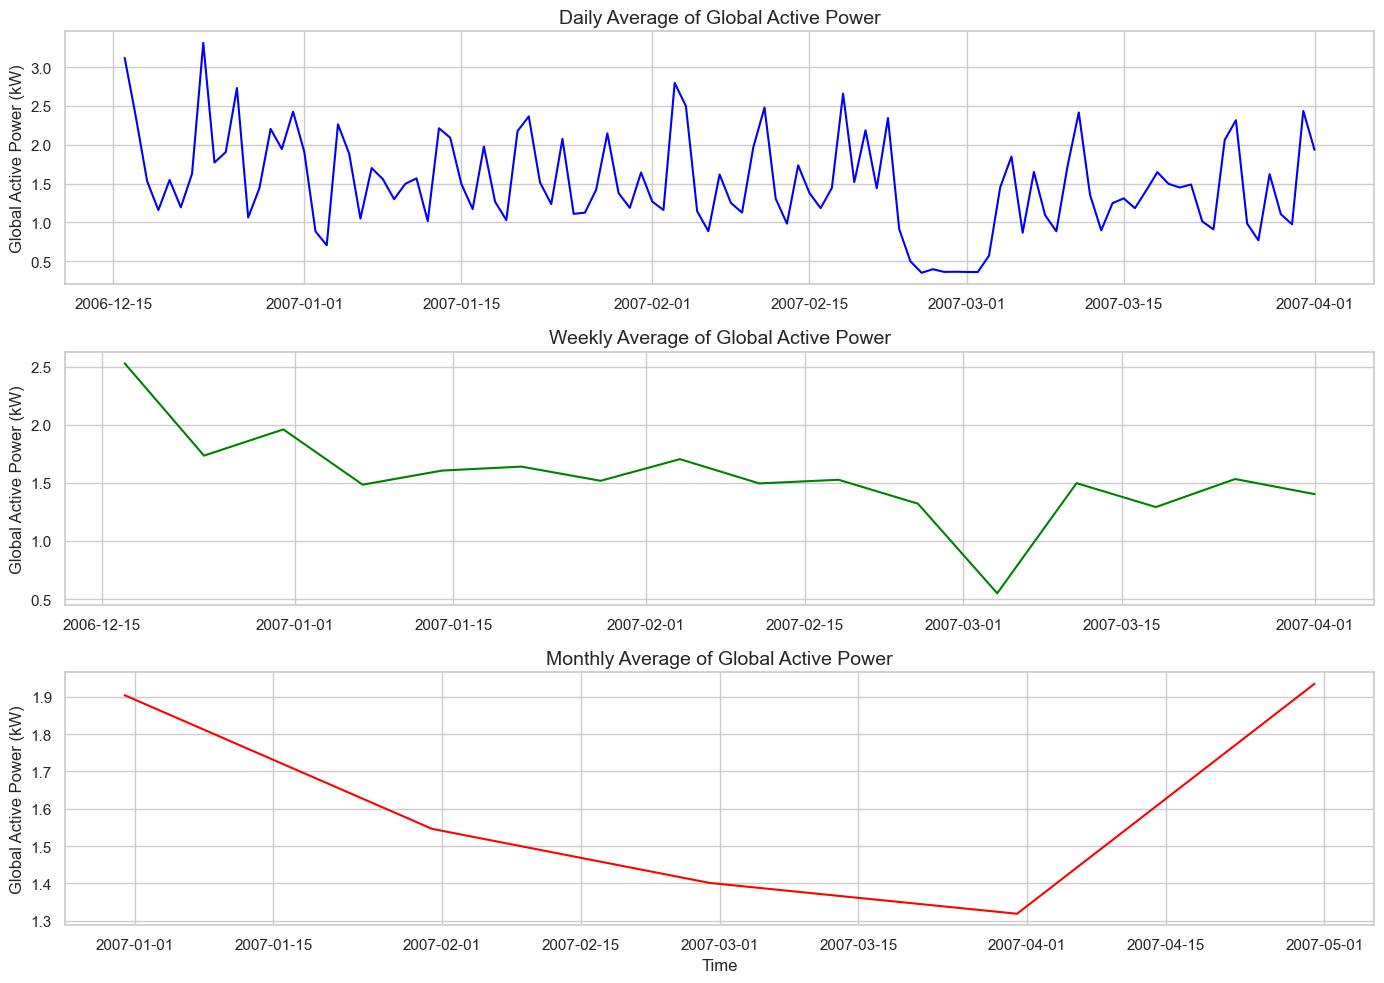

In [39]:
# Aggregating data for daily, weekly, and monthly averages
daily_avg = hourly_data['Global_active_power'].resample('D').mean()
weekly_avg = hourly_data['Global_active_power'].resample('W').mean()
monthly_avg = hourly_data['Global_active_power'].resample('M').mean()

# Plotting the aggregated data
fig, axs = plt.subplots(3, 1, figsize=(14, 10))

# Daily Averages
axs[0].plot(daily_avg, label='Daily Average', color='blue')
axs[0].set_title('Daily Average of Global Active Power', fontsize=14)
axs[0].set_ylabel('Global Active Power (kW)', fontsize=12)

# Weekly Averages
axs[1].plot(weekly_avg, label='Weekly Average', color='green')
axs[1].set_title('Weekly Average of Global Active Power', fontsize=14)
axs[1].set_ylabel('Global Active Power (kW)', fontsize=12)

# Monthly Averages
axs[2].plot(monthly_avg, label='Monthly Average', color='red')
axs[2].set_title('Monthly Average of Global Active Power', fontsize=14)
axs[2].set_ylabel('Global Active Power (kW)', fontsize=12)

plt.xlabel('Time', fontsize=12)
plt.tight_layout()
plt.show()


The aggregated views of Global Active Power consumption on daily, weekly, and monthly bases reveal several patterns and trends:

Daily Averages: The plot shows fluctuations in daily energy consumption, likely reflecting variations in household activity. Days with higher consumption could correspond to more intensive use of appliances or heating/cooling systems, while lower consumption days might reflect periods of minimal usage or absence from the home.

Weekly Averages: The weekly average plot smooths out some of the daily variability, offering a clearer view of longer-term fluctuations. This could help identify weeks with consistently high or low energy usage, which might be influenced by external factors like holidays, seasonal changes, or temporary changes in household routines.

Monthly Averages: The monthly average consumption provides the broadest perspective, highlighting the seasonal trends in energy usage. Peaks might occur during colder or hotter months, depending on heating or cooling needs, while valleys could indicate milder weather or periods of reduced household activity.

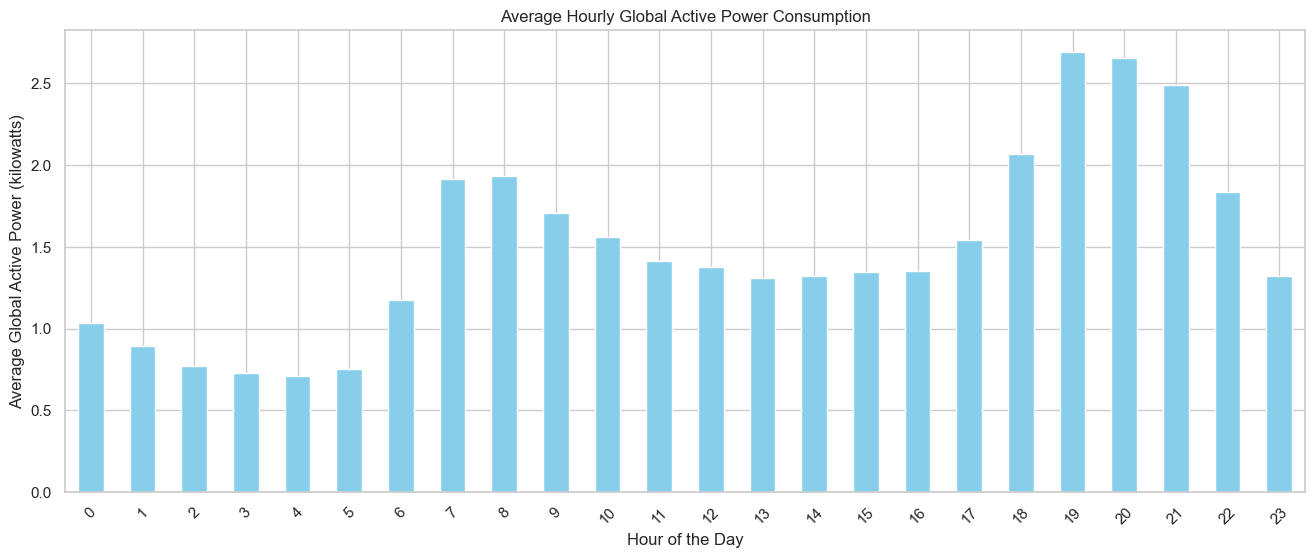

In [400]:
# Plot the average hourly Global Active Power
plt.figure(figsize=(16, 6))
hourly_data.groupby(hourly_data.index.hour)['Global_active_power'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Hourly Global Active Power Consumption')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Global Active Power (kilowatts)')
plt.xticks(range(0, 24), rotation=45)
plt.show()

showing the average hourly Global Active Power, reveals a more general view of consumption patterns over time. It highlights the typical times of day when energy demand peaks and troughs.
There's a noticeable increase in consumption during the morning, followed by a slight decrease, and then a more significant peak in the evening hours. This pattern is consistent with typical household behaviors, where mornings and evenings are active periods due to routines like cooking, heating, or using entertainment devices.
The evening peak is particularly pronounced, suggesting that this period could be the most critical for energy management strategies aiming to shift or reduce load. Reducing consumption during these peak times could lead to significant energy savings and operational efficiencies.

### Time Series Modeling

### SARIMA

RMSE: 0.8442549184764584


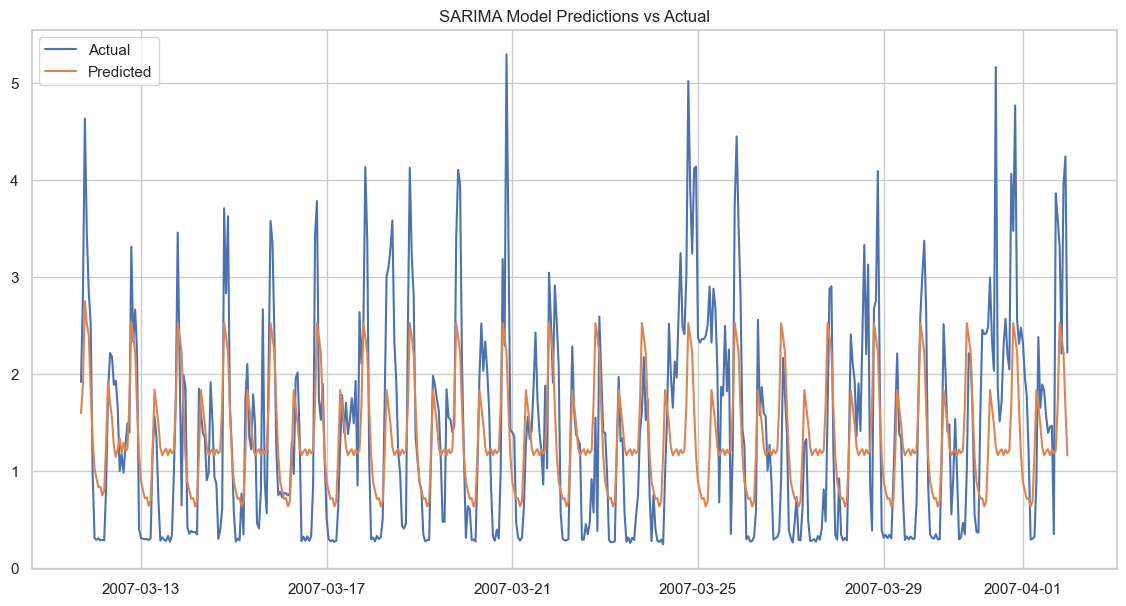

In [436]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Preparing the data: Using the first 80% of data for training and the rest for testing
data_length = len(hourly_data)
train_size = int(data_length * 0.8)

train_data = hourly_data['Global_active_power'][:train_size]
test_data = hourly_data['Global_active_power'][train_size:]

# Initial SARIMA Model: Based on preliminary analysis, let's start with simple parameters.
model = SARIMAX(train_data, order=(1, 0, 1), seasonal_order=(1, 1, 1, 24))

# Fitting the model
sarima_model = model.fit(disp=False)

# Predictions
predictions = sarima_model.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=False)

# Evaluation
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'RMSE: {rmse}')

# Plotting actual vs predicted
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(predictions.index, predictions, label='Predicted')
plt.legend()
plt.title('SARIMA Model Predictions vs Actual')
plt.show()


In [437]:
rmse = np.sqrt(mean_squared_error(test_data, predictions))
r2 = r2_score(test_data, predictions)
print(f'RMSE: {rmse}, R2: {r2}')

RMSE: 0.8442549184764584, R2: 0.39116443040018656


### Hyperparameter Tuning(Failed due to memory error)

In [ ]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt

# Splitting the data into train (80%) and test (20%) sets
split_point = int(len(hourly_data) * 0.8)
train, test = hourly_data['Global_active_power'][:split_point], hourly_data['Global_active_power'][split_point:]

# Auto-tuning SARIMA parameters
auto_model = auto_arima(train, start_p=0, start_q=0, start_P=0, start_Q=0,
                        max_p=2, max_q=2, max_P=2, max_Q=2, seasonal=True, m=24,
                        stepwise=True, trace=True, error_action='ignore', 
                        suppress_warnings=True)

# Summarize the selected model
print(auto_model.summary())

# Forecast
predictions = auto_model.predict(n_periods=len(test))

# Evaluate the model
rmse = sqrt(mean_squared_error(test, predictions))
print(f'RMSE: {rmse}')

# Plot the forecasts against the actual outcomes
plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, predictions, label='Forecast', color='red')
plt.title('Auto-tuned SARIMA Model Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=4792.580, Time=0.31 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=4707.107, Time=1.26 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=4723.823, Time=1.43 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=4790.585, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=4791.111, Time=0.14 sec
 ARIMA(1,1,0)(2,0,0)[24] intercept   : AIC=4662.645, Time=9.55 sec
 ARIMA(1,1,0)(2,0,1)[24] intercept   : AIC=inf, Time=25.50 sec
 ARIMA(1,1,0)(1,0,1)[24] intercept   : AIC=inf, Time=8.25 sec
 ARIMA(0,1,0)(2,0,0)[24] intercept   : AIC=4686.657, Time=9.41 sec
 ARIMA(2,1,0)(2,0,0)[24] intercept   : AIC=4632.243, Time=10.98 sec
 ARIMA(2,1,0)(1,0,0)[24] intercept   : AIC=4679.650, Time=2.23 sec
 ARIMA(2,1,0)(2,0,1)[24] intercept   : AIC=inf, Time=47.21 sec


MemoryError: Unable to allocate 11.4 MiB for an array with shape (27, 27, 2041) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 1014, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 11.4 MiB for an array with shape (27, 27, 2041) and data type float64


In [413]:
hourly_data['Global_active_power'].index

DatetimeIndex(['2006-12-16 17:00:00', '2006-12-16 18:00:00',
               '2006-12-16 19:00:00', '2006-12-16 20:00:00',
               '2006-12-16 21:00:00', '2006-12-16 22:00:00',
               '2006-12-16 23:00:00', '2006-12-17 00:00:00',
               '2006-12-17 01:00:00', '2006-12-17 02:00:00',
               ...
               '2007-04-01 14:00:00', '2007-04-01 15:00:00',
               '2007-04-01 16:00:00', '2007-04-01 17:00:00',
               '2007-04-01 18:00:00', '2007-04-01 19:00:00',
               '2007-04-01 20:00:00', '2007-04-01 21:00:00',
               '2007-04-01 22:00:00', '2007-04-01 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=2551, freq='H')

### Exponential Weighted Moving Averages

In [75]:
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

The MAPE for EWAM is 0.71
RMSE: 1.0329497768544444


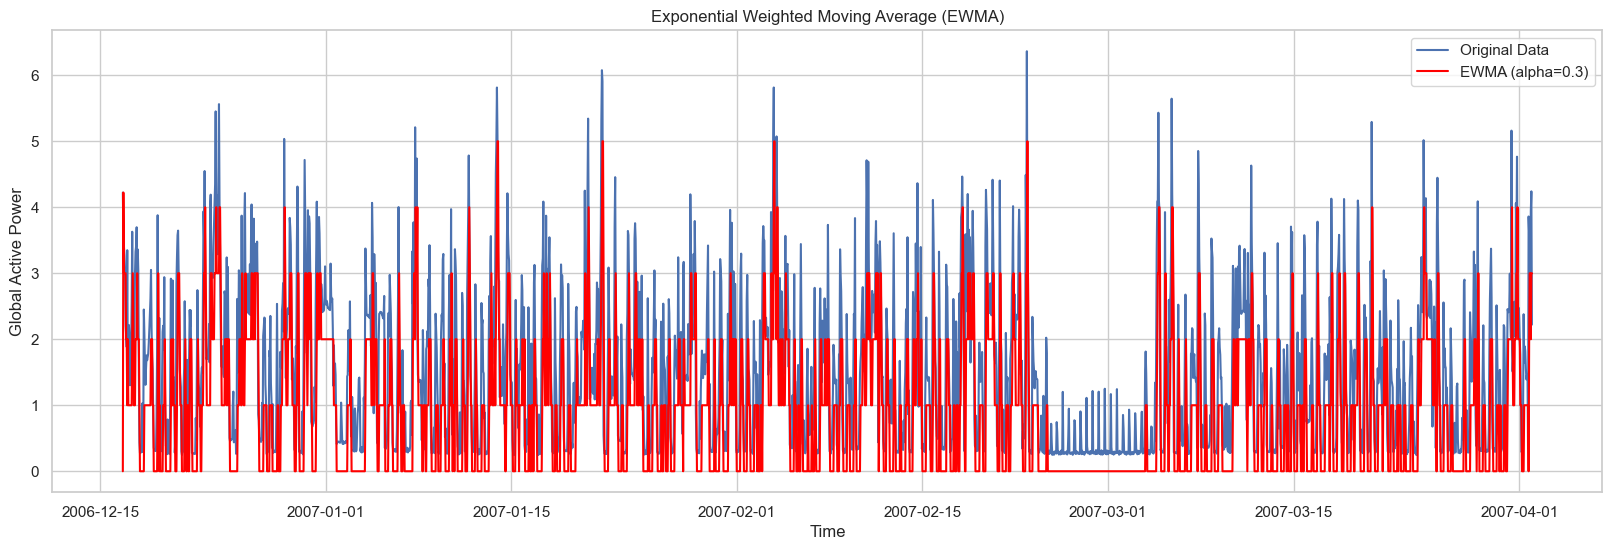

In [434]:
predicted_values_FEB=[]
def EWAM(data):
    predicted_value= data[0]
    alpha=0.3
    error=[]
    for i in range(0,2551):
        if i%2551==0:
            predicted_values_FEB.append(0)
            error.append(0)
            continue
        predicted_values_FEB.append(predicted_value)
        error.append(abs((predicted_value-(data)[i])))
        # print(predicted_value, data[i], i)
        predicted_value =int((alpha*predicted_value) + (1-alpha)*(data[i]))
    # mape_err = ((sum(error)/len(error))/(sum(data.values)/len(data.values)))*100
    # print(mape_err)
    

EWAM(a['Global_active_power'])
print("The MAPE for EWAM is {:.2f}".format(calculate_mape(a['Global_active_power'], predicted_values_FEB)))
# print(calculate_mape(data_FEB['pickup_counts'], predicted_values_FEB))
rmse = np.sqrt(mean_squared_error(a['Global_active_power'], predicted_values_FEB))
print(f'RMSE: {rmse}')

plt.figure(figsize=(20, 6))
plt.plot(hourly_data['Global_active_power'].index, hourly_data['Global_active_power'], label='Original Data')
plt.plot(hourly_data['Global_active_power'].index, predicted_values_FEB, label=f'EWMA (alpha={0.3})', color='red')
plt.title('Exponential Weighted Moving Average (EWMA)')
plt.xlabel('Time')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

In [435]:
rmse = np.sqrt(mean_squared_error(a['Global_active_power'], predicted_values_FEB))
r2 = r2_score(a['Global_active_power'], predicted_values_FEB)
print(f'RMSE: {rmse}, R2: {r2}')

RMSE: 1.0329497768544444, R2: 0.19284650002324477


In [ ]:
# def evaluate_model(model, X_train, y_train, X_test, y_test):
#     y_pred = model.predict(X_test)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     r2 = r2_score(y_test, y_pred)
#     adjusted_r2 = adjusted_r2_score(r2, len(y_test), len(X.columns))
#     print(f"Adjusted R^2: {adjusted_r2}")
#     print(f'RMSE: {rmse}, R2: {r2}')

### Multivariate Time Series Modeling

In [14]:
data_fe = hourly_data.copy()

# Lag Features
for lag in [1, 2, 3, 24]:
    data_fe[f'lag_{lag}'] = data_fe['Global_active_power'].shift(lag)

# Rolling Window Features (EWMA)
# data_fe['ewma_3'] = data_fe['Global_active_power'].ewm(span=3, adjust=False).mean()
data_fe['ewma_6'] = data_fe['Global_active_power'].ewm(span=6, adjust=False).mean()

# Datetime Features
data_fe['hour'] = data_fe.index.hour
data_fe['dayofweek'] = data_fe.index.dayofweek

# Fourier Terms for Daily Seasonality
# Calculate the daily frequency and its harmonics
frequency = 1 / 24  # Daily frequency in hourly data
data_fe['sin_1d'] = np.sin(2 * np.pi * frequency * data_fe.index.hour)
data_fe['cos_1d'] = np.cos(2 * np.pi * frequency * data_fe.index.hour)

# Considering additional harmonics could capture more complex seasonality patterns
data_fe['sin_2d'] = np.sin(4 * np.pi * frequency * data_fe.index.hour)
data_fe['cos_2d'] = np.cos(4 * np.pi * frequency * data_fe.index.hour)

# Remove rows with missing lag values
data_fe.dropna(inplace=True)

# Display the first few rows of the dataframe with the new features
data_fe.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,lag_1,lag_2,lag_3,lag_24,ewma_6,hour,dayofweek,sin_1d,cos_1d,sin_2d,cos_2d
Datetime,,,,,,,,,,,,,,,,,,
2006-12-17 17:00:00,3.406767,0.166633,234.229833,14.510000,0.0,28.0,1009.0,3.326033,2.985400,2.092633,4.222889,2.861352,17,6,-0.965926,-2.588190e-01,5.000000e-01,-8.660254e-01
2006-12-17 18:00:00,3.697100,0.135067,234.372333,15.750000,0.0,0.0,1010.0,3.406767,3.326033,2.985400,3.632200,3.100137,18,6,-1.000000,-1.836970e-16,3.673940e-16,-1.000000e+00
2006-12-17 19:00:00,2.908400,0.265167,233.195667,12.516667,0.0,31.0,1001.0,3.697100,3.406767,3.326033,3.400233,3.045355,19,6,-0.965926,2.588190e-01,-5.000000e-01,-8.660254e-01
2006-12-17 20:00:00,3.361500,0.271500,236.426500,14.276667,0.0,67.0,1027.0,2.908400,3.697100,3.406767,3.268567,3.135682,20,6,-0.866025,5.000000e-01,-8.660254e-01,-5.000000e-01
2006-12-17 21:00:00,3.040767,0.267967,239.104167,12.716667,0.0,72.0,1050.0,3.361500,2.908400,3.697100,3.056467,3.108564,21,6,-0.707107,7.071068e-01,-1.000000e+00,-4.286264e-16


EWMA 3 Hours: Provides a balance between capturing immediate changes and offering a slight smoothing effect. This span could be particularly useful for short-term forecasting where recent trends are predictive.
EWMA 6 Hours: Offers more smoothing while still being responsive to the day's trends. It smooths out the very short-term fluctuations seen in the 1-hour EWMA, providing a clearer view of the intraday trend.

In [15]:
data_fe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2527 entries, 2006-12-17 17:00:00 to 2007-04-01 23:00:00
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    2527 non-null   float64
 1   Global_reactive_power  2527 non-null   float64
 2   Voltage                2527 non-null   float64
 3   Global_intensity       2527 non-null   float64
 4   Sub_metering_1         2527 non-null   float64
 5   Sub_metering_2         2527 non-null   float64
 6   Sub_metering_3         2527 non-null   float64
 7   lag_1                  2527 non-null   float64
 8   lag_2                  2527 non-null   float64
 9   lag_3                  2527 non-null   float64
 10  lag_24                 2527 non-null   float64
 11  ewma_6                 2527 non-null   float64
 12  hour                   2527 non-null   int32  
 13  dayofweek              2527 non-null   int32  
 14  sin_1d              

In [16]:
# Prepare the dataset for modeling
X = data_fe.drop(['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                           'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], axis=1)
y = data_fe['Global_active_power']

In [17]:
X.head()

,lag_1,lag_2,lag_3,lag_24,ewma_6,hour,dayofweek,sin_1d,cos_1d,sin_2d,cos_2d
Datetime,,,,,,,,,,,
2006-12-17 17:00:00,3.326033,2.985400,2.092633,4.222889,2.861352,17,6,-0.965926,-2.588190e-01,5.000000e-01,-8.660254e-01
2006-12-17 18:00:00,3.406767,3.326033,2.985400,3.632200,3.100137,18,6,-1.000000,-1.836970e-16,3.673940e-16,-1.000000e+00
2006-12-17 19:00:00,3.697100,3.406767,3.326033,3.400233,3.045355,19,6,-0.965926,2.588190e-01,-5.000000e-01,-8.660254e-01
2006-12-17 20:00:00,2.908400,3.697100,3.406767,3.268567,3.135682,20,6,-0.866025,5.000000e-01,-8.660254e-01,-5.000000e-01
2006-12-17 21:00:00,3.361500,2.908400,3.697100,3.056467,3.108564,21,6,-0.707107,7.071068e-01,-1.000000e+00,-4.286264e-16


In [18]:
X = pd.get_dummies(X, columns=['hour', 'dayofweek'], drop_first=True)
X.head()

,lag_1,lag_2,lag_3,lag_24,ewma_6,sin_1d,cos_1d,sin_2d,cos_2d,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-12-17 17:00:00,3.326033,2.985400,2.092633,4.222889,2.861352,-0.965926,-2.588190e-01,5.000000e-01,-8.660254e-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
2006-12-17 18:00:00,3.406767,3.326033,2.985400,3.632200,3.100137,-1.000000,-1.836970e-16,3.673940e-16,-1.000000e+00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
2006-12-17 19:00:00,3.697100,3.406767,3.326033,3.400233,3.045355,-0.965926,2.588190e-01,-5.000000e-01,-8.660254e-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
2006-12-17 20:00:00,2.908400,3.697100,3.406767,3.268567,3.135682,-0.866025,5.000000e-01,-8.660254e-01,-5.000000e-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
2006-12-17 21:00:00,3.361500,2.908400,3.697100,3.056467,3.108564,-0.707107,7.071068e-01,-1.000000e+00,-4.286264e-16,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True


In [21]:
scaler = StandardScaler()

# Fit and transform the data
X = scaler.fit_transform(X)

In [23]:
X = pd.DataFrame(X)

In [24]:
y.head()

Datetime
2006-12-17 17:00:00    3.406767
2006-12-17 18:00:00    3.697100
2006-12-17 19:00:00    2.908400
2006-12-17 20:00:00    3.361500
2006-12-17 21:00:00    3.040767
Name: Global_active_power, dtype: float64

In [359]:
# X.to_csv('Household_X.csv')
# y.to_csv('Household_y.csv')

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [26]:
from sklearn.model_selection import train_test_split

# Sequential Train/Test Split
# We'll use the last 20% of the data as the test set
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1768, 38), (759, 38), (1768,), (759,))

In [27]:
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [28]:
# Function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = adjusted_r2_score(r2, len(y_test), len(X.columns))
    print(f"Adjusted R^2: {adjusted_r2}")
    print(f'RMSE: {rmse}, R2: {r2}')

# Function to plot learning curves
def plot_learning_curve(model, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=3, scoring='neg_mean_squared_error', 
                                                            train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

Adjusted R^2: 0.8817931157873413
RMSE: 0.37219838584338305, R2: 0.8877190545737279


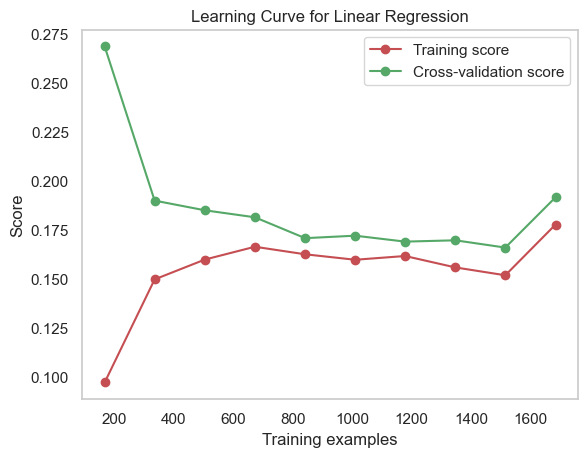

In [29]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model(lr, X_train, y_train, X_test, y_test)
plot_learning_curve(lr, 'Learning Curve for Linear Regression')

Adjusted R^2: 0.7282186029874179
RMSE: 0.5643687571506095, R2: 0.741843527903616


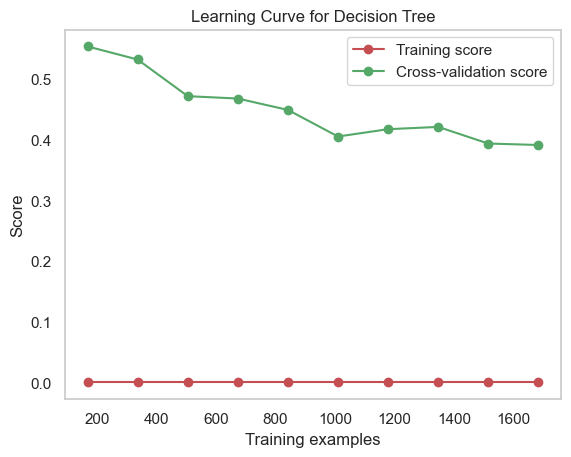

In [30]:
# Decision Tree Model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
evaluate_model(dt, X_train, y_train, X_test, y_test)
plot_learning_curve(dt, 'Learning Curve for Decision Tree')

Adjusted R^2: 0.8607228704875662
RMSE: 0.40401082720459686, R2: 0.8677051012546804


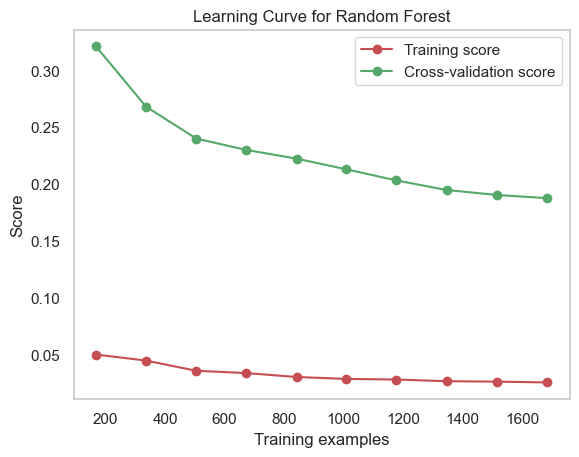

In [428]:
# Random Forest Model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_train, y_train, X_test, y_test)
plot_learning_curve(rf, 'Learning Curve for Random Forest')

Adjusted R^2: 0.8793954260898288
RMSE: 0.3759542421809432, R2: 0.885441565678993


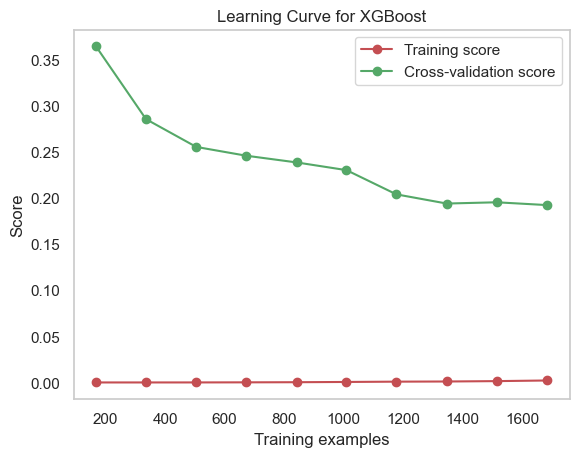

In [429]:
# XGBoost Model
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
evaluate_model(xgb, X_train, y_train, X_test, y_test)
plot_learning_curve(xgb, 'Learning Curve for XGBoost')

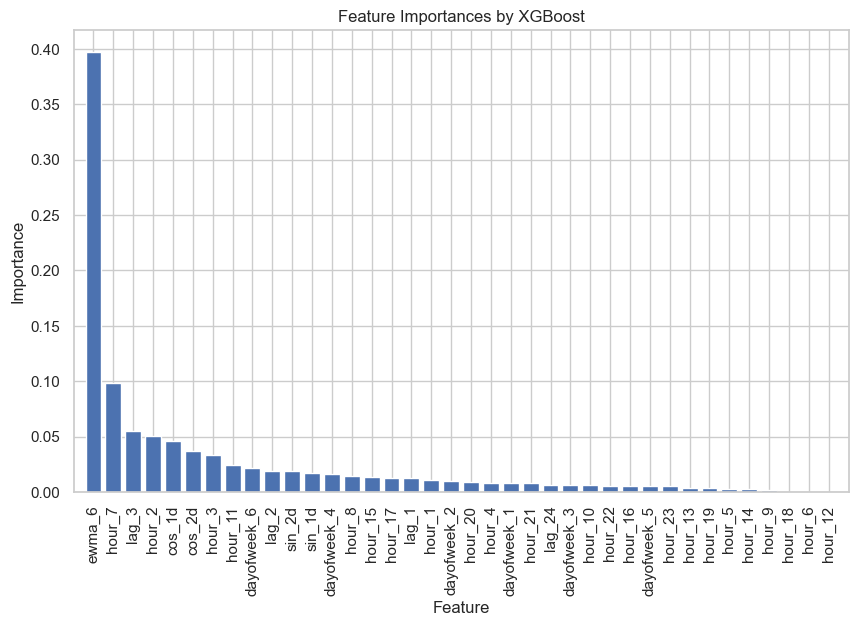

In [430]:
# Plotting feature importances
feature_importances = xgb.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances by XGBoost')
plt.bar(range(X_train.shape[1]), feature_importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [389]:
from sklearn.model_selection import cross_val_score, KFold

In [390]:
# Set up K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to perform cross-validation
def perform_cross_validation(model, X, y):
    mse_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    print(f"Mean MSE: {np.mean(mse_scores):.4f} (+/- {np.std(mse_scores):.4f})")
    print(f"Mean R2: {np.mean(r2_scores):.4f} (+/- {np.std(r2_scores):.4f})")

In [391]:
# Linear Regression
print("Linear Regression Cross-Validation")
lr = LinearRegression()
perform_cross_validation(lr, X, y)

Linear Regression Cross-Validation
Mean MSE: 0.1590 (+/- 0.0122)
Mean R2: 0.8791 (+/- 0.0029)


In [392]:
# Decision Tree
print("\nDecision Tree Cross-Validation")
dt = DecisionTreeRegressor(random_state=42)
perform_cross_validation(dt, X, y)


Decision Tree Cross-Validation
Mean MSE: 0.3606 (+/- 0.0467)
Mean R2: 0.7262 (+/- 0.0244)


In [393]:
# Random Forest
print("\nRandom Forest Cross-Validation")
rf = RandomForestRegressor(random_state=42)
perform_cross_validation(rf, X, y)


Random Forest Cross-Validation
Mean MSE: 0.1744 (+/- 0.0141)
Mean R2: 0.8673 (+/- 0.0060)


In [394]:
# XGBoost
print("\nXGBoost Cross-Validation")
xgb = XGBRegressor(random_state=42)
perform_cross_validation(xgb, X, y)


XGBoost Cross-Validation
Mean MSE: 0.1698 (+/- 0.0096)
Mean R2: 0.8706 (+/- 0.0050)


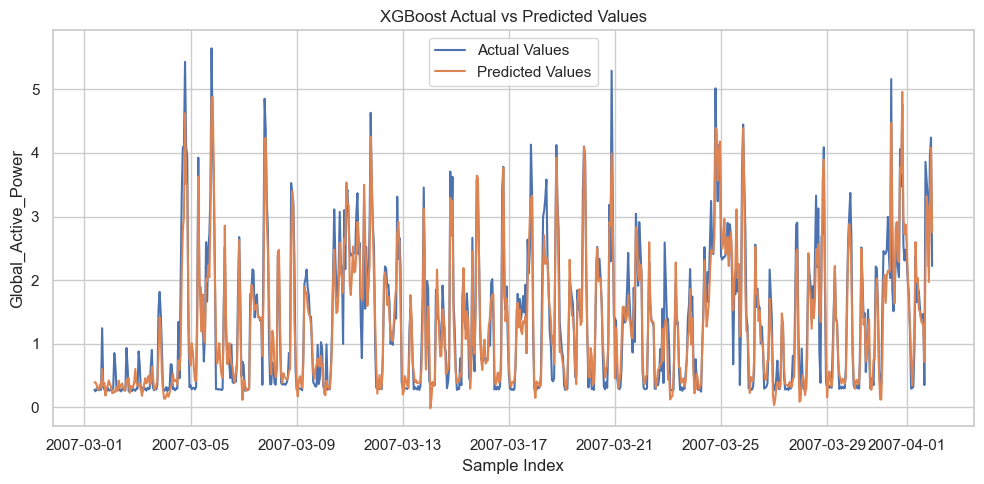

In [433]:
y_pred = xgb.predict(X_test)

# Plotting the forecast against the actual outcomes
plt.figure(figsize=(10, 5))
# plt.plot(y_test.index, y_test, label='Actual Values', marker='o')
# plt.plot(y_test.index, y_pred, label='Predicted Values', linestyle='--', marker='x')
plt.plot(y_test.index, y_test, label='Actual Values')
plt.plot(y_test.index, y_pred, label='Predicted Values')
plt.title('XGBoost Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Global_Active_Power')
plt.legend()
plt.tight_layout()
plt.show()

In [397]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from datetime import datetime
start = datetime.now()
# Since the data is a time series, we use TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Define the model
model = XGBRegressor()

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", np.sqrt(-grid_search.best_score_))
print(datetime.now() - start)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.7}
Best score found:  0.4084245138510363
0:27:28.690462


Adjusted R^2: 0.8962330458232018
RMSE: 0.34872464029198363, R2: 0.9014350831038329


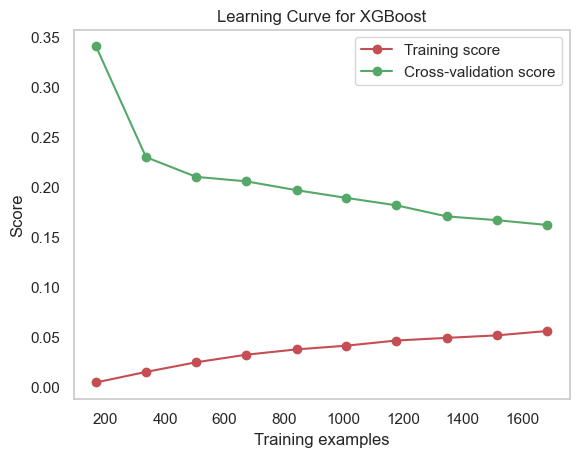

In [431]:
# XGBoost Model
xgb = XGBRegressor(colsample_bytree = 1.0, learning_rate = 0.1, max_depth = 3, min_child_weight = 5, n_estimators = 300, subsample = 0.7, random_state=42)
xgb.fit(X_train, y_train)
evaluate_model(xgb, X_train, y_train, X_test, y_test)
plot_learning_curve(xgb, 'Learning Curve for XGBoost')

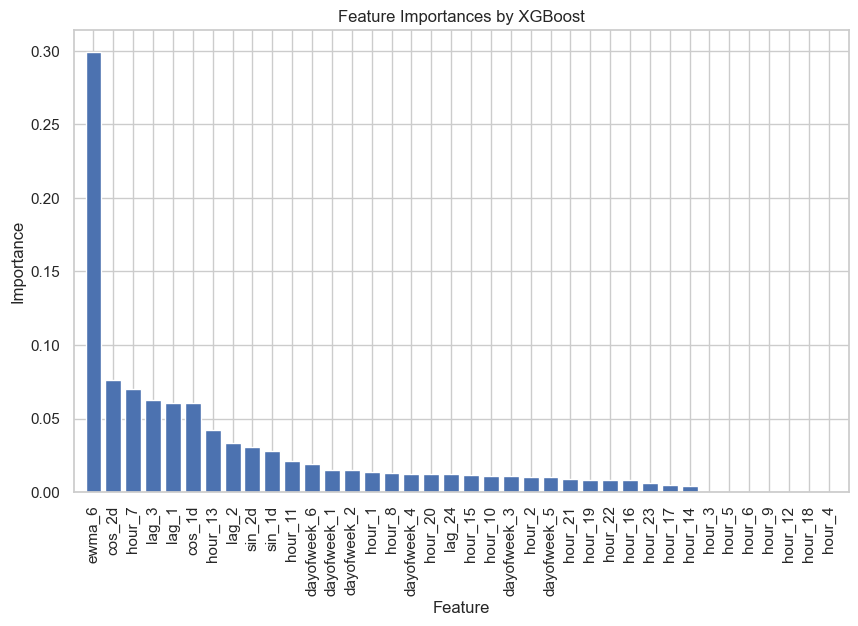

In [432]:
# Plotting feature importances
feature_importances = xgb.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances by XGBoost')
plt.bar(range(X_train.shape[1]), feature_importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()